MILESTONE #1 - LINKING API & EXPORTING DATA TO CSV

In [106]:
pip install python-holidayapi

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\NicoleKubec\AppData\Local\Programs\PythonCodingPack\python.exe -m pip install --upgrade pip' command.


In [107]:
import holidayapi

In [108]:
import pandas as pd
import numpy as np
import requests
import json


In [109]:
import holidayapi
key = 'bf32e92e-8a52-4cfc-a046-16722e2c8726'
hapi = holidayapi.v1(key)
holidays = hapi.holidays({
  'country': 'US',
  'year': '2020',
})
holidays

{'status': 200,
 'warning': 'These results do not include state and province holidays. For more information, please visit https://holidayapi.com/docs',
 'requests': {'used': 13, 'available': 9987, 'resets': '2022-01-01 00:00:00'},
 'holidays': [{'name': "New Year's Day",
   'date': '2020-01-01',
   'observed': '2020-01-01',
   'public': True,
   'country': 'US',
   'uuid': '82f78b8a-019e-479e-a19f-99040275f9bf',
   'weekday': {'date': {'name': 'Wednesday', 'numeric': '3'},
    'observed': {'name': 'Wednesday', 'numeric': '3'}}},
  {'name': 'Seventh Day of Kwanzaa',
   'date': '2020-01-01',
   'observed': '2020-01-01',
   'public': False,
   'country': 'US',
   'uuid': '0e766ff3-0d31-40e1-85e1-49ed61ab006d',
   'weekday': {'date': {'name': 'Wednesday', 'numeric': '3'},
    'observed': {'name': 'Wednesday', 'numeric': '3'}}},
  {'name': 'Epiphany',
   'date': '2020-01-06',
   'observed': '2020-01-06',
   'public': False,
   'country': 'US',
   'uuid': '61d8d9ba-8ce1-4e64-9b1a-f40d30f74a5

In [110]:
holidays = hapi.holidays({
  'country': 'AUS, US, CA',
  'year': '2020',
})
holidays
#testing data retrieval from multiple countries - site states I can do up to 10 comma separated values for countries...compare up to 10 countries

{'status': 200,
 'requests': {'used': 14, 'available': 9986, 'resets': '2022-01-01 00:00:00'},
 'holidays': [{'name': "New Year's Day",
   'date': '2020-01-01',
   'observed': '2020-01-01',
   'public': True,
   'country': 'AU',
   'uuid': '042450ab-141c-4ed5-954c-02f356d61692',
   'weekday': {'date': {'name': 'Wednesday', 'numeric': '3'},
    'observed': {'name': 'Wednesday', 'numeric': '3'}}},
  {'name': "New Year's Day",
   'date': '2020-01-01',
   'observed': '2020-01-01',
   'public': True,
   'country': 'US',
   'uuid': '82f78b8a-019e-479e-a19f-99040275f9bf',
   'weekday': {'date': {'name': 'Wednesday', 'numeric': '3'},
    'observed': {'name': 'Wednesday', 'numeric': '3'}}},
  {'name': 'Seventh Day of Kwanzaa',
   'date': '2020-01-01',
   'observed': '2020-01-01',
   'public': False,
   'country': 'US',
   'uuid': '0e766ff3-0d31-40e1-85e1-49ed61ab006d',
   'weekday': {'date': {'name': 'Wednesday', 'numeric': '3'},
    'observed': {'name': 'Wednesday', 'numeric': '3'}}},
  {'name

In [111]:
holidays = hapi.holidays({
  'country': 'MX, US, CA',
  'year': '2020',
})
holidays
#I can only do 10 countries
#there are 23 countries in North America...too many to compare....I will just do the countries on the actual North American continent
#That is USA(Country code US), Mexico(Country Code MX), Canada(Country Code CA)

{'status': 200,
 'requests': {'used': 15, 'available': 9985, 'resets': '2022-01-01 00:00:00'},
 'holidays': [{'name': "New Year's Day",
   'date': '2020-01-01',
   'observed': '2020-01-01',
   'public': True,
   'country': 'MX',
   'uuid': 'cee56502-97a2-461b-a491-e82c145f6358',
   'weekday': {'date': {'name': 'Wednesday', 'numeric': '3'},
    'observed': {'name': 'Wednesday', 'numeric': '3'}}},
  {'name': "New Year's Day",
   'date': '2020-01-01',
   'observed': '2020-01-01',
   'public': True,
   'country': 'US',
   'uuid': '82f78b8a-019e-479e-a19f-99040275f9bf',
   'weekday': {'date': {'name': 'Wednesday', 'numeric': '3'},
    'observed': {'name': 'Wednesday', 'numeric': '3'}}},
  {'name': 'Seventh Day of Kwanzaa',
   'date': '2020-01-01',
   'observed': '2020-01-01',
   'public': False,
   'country': 'US',
   'uuid': '0e766ff3-0d31-40e1-85e1-49ed61ab006d',
   'weekday': {'date': {'name': 'Wednesday', 'numeric': '3'},
    'observed': {'name': 'Wednesday', 'numeric': '3'}}},
  {'name

In [112]:
holidays=holidays['holidays']
#indexs into the info required...without this call, the data show up as one line/one row in the csv - credit to Jacob for the idea :) !!

In [113]:
from pandas.io.json import json_normalize
df_holiday = json_normalize(holidays)
df_holiday.head()
#normalizing the data into rows and columns

<ipython-input-113-bab57f2d1066>:2: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  df_holiday = json_normalize(holidays)


,name,date,observed,public,country,uuid,weekday.date.name,weekday.date.numeric,weekday.observed.name,weekday.observed.numeric
0,New Year's Day,2020-01-01,2020-01-01,True,MX,cee56502-97a2-461b-a491-e82c145f6358,Wednesday,3,Wednesday,3
1,New Year's Day,2020-01-01,2020-01-01,True,US,82f78b8a-019e-479e-a19f-99040275f9bf,Wednesday,3,Wednesday,3
2,Seventh Day of Kwanzaa,2020-01-01,2020-01-01,False,US,0e766ff3-0d31-40e1-85e1-49ed61ab006d,Wednesday,3,Wednesday,3
3,New Year's Day,2020-01-01,2020-01-01,True,CA,1f9bc6e3-b71c-44cb-a62d-6453db68ec50,Wednesday,3,Wednesday,3
4,Epiphany,2020-01-06,2020-01-06,False,MX,e68fbdb6-2bac-4947-bb9f-93d5d0ca52ce,Monday,1,Monday,1


In [114]:
df_holiday.to_csv(path_or_buf='holidays2020-US-CA-MX.csv', index=False/True)
#writing the data to the holidays2020-US-CA-MX csv file

MILESTONE #2 - Answering questions based on data from HolidayAPI

Central Tendency Measure Question #1 - What are the number of holidays in each country? (USA, Canada Mexico)

US    146

MX     51

CA     32

In [115]:
df_holiday = pd.read_csv('holidays2020-US-CA-MX.csv')
df_holiday.shape
#reading the file to see the shape of the data

(229, 10)

In [127]:
df_holiday_countrycount = df['country'].value_counts()
df_holiday_countrycount
#value counts of the number of holidays in each country in 2020

US    146
MX     51
CA     32
Name: country, dtype: int64

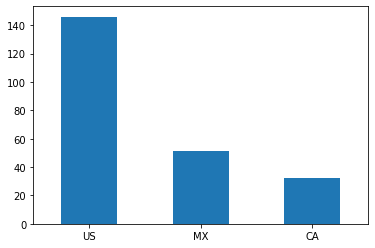

In [128]:
df_holiday_countrycount_chart = df_holiday_countrycount.plot.bar(rot=0)
#quick chart to show number of holidays in each country in 2020

Central Tendency Measure Question #2 - 